In [1]:
# Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Load the data

In [2]:
# Load the datasets.
title = pd.read_csv('title.basics.tsv', sep='\t')
principals = pd.read_csv('title.principals.tsv', sep='\t')
crew = pd.read_csv('title.crew.tsv', sep='\t')
name = pd.read_csv('name.basics.tsv', sep='\t')
rating = pd.read_csv('title.ratings.tsv', sep='\t')

In [3]:
title.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [5]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [6]:
name.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0037382,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"


## 2. Filter data to identify Flanagan's titles and roles

In [7]:
# Find the individual identifier for Mike Flanagan.
print(name[(name['primaryName'] == 'Mike Flanagan') & (name['birthYear'] == '1978')])

            nconst    primaryName birthYear deathYear       primaryProfession  \
1792594  nm1093039  Mike Flanagan      1978        \N  writer,editor,producer   

                                   knownForTitles  
1792594  tt3748172,tt10574558,tt5606664,tt6763664  


In [8]:
# Filter the principals dataframe to obtain a list of all the movies/shows that Flanagan has been involved with.
flan_roles = principals[principals['nconst'] == 'nm1093039']

# View the output.
flan_roles

,tconst,ordering,nconst,category,job,characters
1336836,tt0166186,5,nm1093039,director,\N,\N
2255890,tt0305793,5,nm1093039,director,\N,\N
2771878,tt0385592,8,nm1093039,cinematographer,\N,\N
2771979,tt0385605,8,nm1093039,editor,\N,\N
2838978,tt0395558,5,nm1093039,director,\N,\N
...,...,...,...,...,...,...
53815650,tt8160068,5,nm1093039,director,\N,\N
53815660,tt8160070,5,nm1093039,director,\N,\N
53815670,tt8160072,5,nm1093039,director,\N,\N
53815683,tt8160076,5,nm1093039,director,\N,\N


In [9]:
# Explore Flanagan's roles.
flan_roles.category.value_counts()

director           37
writer             29
editor             15
self                6
actor               1
producer            1
cinematographer     1
Name: category, dtype: int64

In [10]:
# Filter the titles dataframe by the list of movies/shows identifiers derived from the flan_roles dataframe.
flan_titles = title[title.tconst.isin(flan_roles['tconst'])]

# View the output.
flan_titles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
160621,tt0166186,movie,Still Life,Still Life,0,2001,\N,90,Drama
292591,tt0305793,movie,Makebelieve,Makebelieve,0,2000,\N,90,Drama
369308,tt0385592,movie,Chainsaw Sally,Chainsaw Sally,0,2004,\N,83,"Comedy,Horror,Thriller"
369321,tt0385605,movie,Cold Harbor,Cold Harbor,0,2003,\N,98,Drama
378954,tt0395558,movie,Ghosts of Hamilton Street,Ghosts of Hamilton Street,0,2003,\N,106,"Drama,Fantasy,Mystery"
...,...,...,...,...,...,...,...,...,...
9477716,tt8160068,tvEpisode,Eulogy,Eulogy,0,2018,\N,60,"Drama,Horror,Mystery"
9477717,tt8160070,tvEpisode,Witness Marks,Witness Marks,0,2018,\N,43,"Drama,Horror,Mystery"
9477718,tt8160072,tvEpisode,Screaming Meemies,Screaming Meemies,0,2018,\N,58,"Drama,Horror,Mystery"
9477720,tt8160076,tvEpisode,Silence Lay Steadily,Silence Lay Steadily,0,2018,\N,71,"Drama,Horror,Mystery"


In [11]:
# Merge flan_roles and flan_titles to retain a column indicating the role Flanagan played.
flan_job = flan_titles.merge(flan_roles, how='inner', on='tconst')

# Rename column describing Flanagan's role
flan_job = flan_job.rename(columns={'category': 'FlanJob'})

# Drop unnecessary columns.
flan_job = flan_job.drop(columns=['titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'ordering', 'nconst', 'job', 'characters'])
                       
# View the output.
flan_job

,tconst,FlanJob
0,tt0166186,director
1,tt0305793,director
2,tt0385592,cinematographer
3,tt0385605,editor
4,tt0395558,director
...,...,...
85,tt8160068,director
86,tt8160070,director
87,tt8160072,director
88,tt8160076,director


## 3. Filter data to identify the list of actors/actresses in Flanagan's titles

In [66]:
# Filter the principals dataframe by the list of movies/shows identifiers derived from the flan_titles dataframe.
flan_people = principals[principals.tconst.isin(flan_titles['tconst'])]

# View the output.
flan_people

,tconst,ordering,nconst,category,job,characters
1336832,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]"
1336833,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]"
1336834,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]"
1336835,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]"
1336836,tt0166186,5,nm1093039,director,\N,\N
...,...,...,...,...,...,...
58646036,tt9821166,5,nm1093039,director,\N,\N
58646037,tt9821166,6,nm0416556,writer,based on the work of,\N
58646038,tt9821166,7,nm1530627,writer,staff writer,\N
58646039,tt9821166,8,nm3743024,producer,producer,\N


In [67]:
flan_people.category.value_counts()

writer                 207
actress                174
actor                  116
director                81
producer                71
self                    57
cinematographer         34
editor                  33
composer                31
production_designer      5
archive_footage          1
Name: category, dtype: int64

In [68]:
# Find the actors starring in Flanagan's productions by filtering the flan_people dataframe by category.
flan_actors = flan_people[(flan_people['category'] == 'actor') | (flan_people['category'] == 'actress')]

# View the output.
flan_actors

,tconst,ordering,nconst,category,job,characters
1336832,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]"
1336833,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]"
1336834,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]"
1336835,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]"
2255886,tt0305793,1,nm1091275,actor,\N,"[""Ryan Marzano""]"
...,...,...,...,...,...,...
53815682,tt8160076,4,nm0714147,actress,\N,"[""Shirley Crain""]"
58646032,tt9821166,1,nm6442992,actress,\N,"[""Dani Clayton""]"
58646033,tt9821166,2,nm2719825,actor,\N,"[""Peter""]"
58646034,tt9821166,3,nm4633678,actress,\N,"[""Jamie Taylor""]"


## 4. Combine actor information with title information

In [69]:
# Merge the name dataframe with flan_actors to add primaryName and other actor information.
flan_actorsn = flan_actors.merge(name, how='left', on='nconst')

# View output.
flan_actorsn

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186"
1,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]",Zak Jeffries,\N,\N,actor,"tt2388715,tt0395558,tt0305793,tt0166186"
2,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]",Natalie Roers,1979,\N,actress,"tt18340208,tt3748172,tt6926986,tt3174376"
3,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]",Michael Caloia,\N,\N,actor,tt0166186
4,tt0305793,1,nm1091275,actor,\N,"[""Ryan Marzano""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186"
...,...,...,...,...,...,...,...,...,...,...,...
285,tt8160076,4,nm0714147,actress,\N,"[""Shirley Crain""]",Elizabeth Reaser,1975,\N,actress,"tt1259571,tt4361050,tt0356680,tt1099212"
286,tt9821166,1,nm6442992,actress,\N,"[""Dani Clayton""]",Victoria Pedretti,1995,\N,actress,"tt7131622,tt7335184,tt10970552,tt6763664"
287,tt9821166,2,nm2719825,actor,\N,"[""Peter""]",Oliver Jackson-Cohen,1986,\N,actor,"tt1051906,tt0770703,tt1322312,tt1433108"
288,tt9821166,3,nm4633678,actress,\N,"[""Jamie Taylor""]",Amelia Eve,\N,\N,"actress,production_manager","tt16374352,tt14130104,tt10970552"


In [70]:
# Merge the title dataframe with flan_actors to add title information.
flan_actortitle = flan_actorsn.merge(title, how='left', on='tconst')

# View output.
flan_actortitle

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186",movie,Still Life,Still Life,0,2001,\N,90,Drama
1,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]",Zak Jeffries,\N,\N,actor,"tt2388715,tt0395558,tt0305793,tt0166186",movie,Still Life,Still Life,0,2001,\N,90,Drama
2,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]",Natalie Roers,1979,\N,actress,"tt18340208,tt3748172,tt6926986,tt3174376",movie,Still Life,Still Life,0,2001,\N,90,Drama
3,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]",Michael Caloia,\N,\N,actor,tt0166186,movie,Still Life,Still Life,0,2001,\N,90,Drama
4,tt0305793,1,nm1091275,actor,\N,"[""Ryan Marzano""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186",movie,Makebelieve,Makebelieve,0,2000,\N,90,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,tt8160076,4,nm0714147,actress,\N,"[""Shirley Crain""]",Elizabeth Reaser,1975,\N,actress,"tt1259571,tt4361050,tt0356680,tt1099212",tvEpisode,Silence Lay Steadily,Silence Lay Steadily,0,2018,\N,71,"Drama,Horror,Mystery"
286,tt9821166,1,nm6442992,actress,\N,"[""Dani Clayton""]",Victoria Pedretti,1995,\N,actress,"tt7131622,tt7335184,tt10970552,tt6763664",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery"
287,tt9821166,2,nm2719825,actor,\N,"[""Peter""]",Oliver Jackson-Cohen,1986,\N,actor,"tt1051906,tt0770703,tt1322312,tt1433108",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery"
288,tt9821166,3,nm4633678,actress,\N,"[""Jamie Taylor""]",Amelia Eve,\N,\N,"actress,production_manager","tt16374352,tt14130104,tt10970552",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery"


In [71]:
# Merge the previous dataframe with flan_job to add the role Flanagan played in each production.
flan_actortitle = flan_actortitle.merge(flan_job, how='left', on='tconst')

# View output.
flan_actortitle

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,FlanJob
0,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186",movie,Still Life,Still Life,0,2001,\N,90,Drama,director
1,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]",Zak Jeffries,\N,\N,actor,"tt2388715,tt0395558,tt0305793,tt0166186",movie,Still Life,Still Life,0,2001,\N,90,Drama,director
2,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]",Natalie Roers,1979,\N,actress,"tt18340208,tt3748172,tt6926986,tt3174376",movie,Still Life,Still Life,0,2001,\N,90,Drama,director
3,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]",Michael Caloia,\N,\N,actor,tt0166186,movie,Still Life,Still Life,0,2001,\N,90,Drama,director
4,tt0305793,1,nm1091275,actor,\N,"[""Ryan Marzano""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous","tt0305793,tt0395558,tt0166186",movie,Makebelieve,Makebelieve,0,2000,\N,90,Drama,director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,tt8160076,4,nm0714147,actress,\N,"[""Shirley Crain""]",Elizabeth Reaser,1975,\N,actress,"tt1259571,tt4361050,tt0356680,tt1099212",tvEpisode,Silence Lay Steadily,Silence Lay Steadily,0,2018,\N,71,"Drama,Horror,Mystery",director
286,tt9821166,1,nm6442992,actress,\N,"[""Dani Clayton""]",Victoria Pedretti,1995,\N,actress,"tt7131622,tt7335184,tt10970552,tt6763664",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery",director
287,tt9821166,2,nm2719825,actor,\N,"[""Peter""]",Oliver Jackson-Cohen,1986,\N,actor,"tt1051906,tt0770703,tt1322312,tt1433108",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery",director
288,tt9821166,3,nm4633678,actress,\N,"[""Jamie Taylor""]",Amelia Eve,\N,\N,"actress,production_manager","tt16374352,tt14130104,tt10970552",tvEpisode,The Great Good Place,The Great Good Place,0,2020,\N,54,"Drama,Horror,Mystery",director


In [72]:
# Merge the rating dataframe with flan_actorstitle to add ratings information.
flan_actortitler = flan_actortitle.merge(rating, how='inner', on='tconst')

In [73]:
# Rename dataframe for ease of use.
flan = flan_actortitler.copy()

In [74]:
flan_titles.titleType.value_counts()

tvEpisode       61
movie           21
tvMiniSeries     4
short            2
tvSeries         1
tvSpecial        1
Name: titleType, dtype: int64

In [75]:
# Create a filtered dataframe to exclude tvEpisode and tvSpecial
flanf = flan[(flan['titleType'] != 'tvEpisode') & (flan['titleType'] != 'tvSpecial')]

# View output.
flanf

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,FlanJob,averageRating,numVotes
0,tt0166186,1,nm1091275,actor,\N,"[""David Styles""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous",...,Still Life,Still Life,0,2001,\N,90,Drama,director,5.5,75
1,tt0166186,2,nm1101807,actor,\N,"[""Danny Potter""]",Zak Jeffries,\N,\N,actor,...,Still Life,Still Life,0,2001,\N,90,Drama,director,5.5,75
2,tt0166186,3,nm1092778,actress,\N,"[""Karma Quail""]",Natalie Roers,1979,\N,actress,...,Still Life,Still Life,0,2001,\N,90,Drama,director,5.5,75
3,tt0166186,4,nm1111516,actor,\N,"[""Kevin Koufax""]",Michael Caloia,\N,\N,actor,...,Still Life,Still Life,0,2001,\N,90,Drama,director,5.5,75
4,tt0305793,1,nm1091275,actor,\N,"[""Ryan Marzano""]",Jamie Sinsz,\N,\N,"actor,sound_department,miscellaneous",...,Makebelieve,Makebelieve,0,2000,\N,90,Drama,director,5.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,tt6763664,4,nm0714147,actress,\N,"[""Shirley Crain""]",Elizabeth Reaser,1975,\N,actress,...,The Haunting of Hill House,The Haunting of Hill House,0,2018,2018,572,"Drama,Horror,Mystery",writer,8.6,275075
228,tt6763664,6,nm2719825,actor,\N,"[""Luke Crain""]",Oliver Jackson-Cohen,1986,\N,actor,...,The Haunting of Hill House,The Haunting of Hill House,0,2018,2018,572,"Drama,Horror,Mystery",writer,8.6,275075
229,tt6763664,7,nm2318089,actress,\N,"[""Theodora Crain""]",Kate Siegel,1982,\N,"actress,writer,make_up_department",...,The Haunting of Hill House,The Haunting of Hill House,0,2018,2018,572,"Drama,Horror,Mystery",writer,8.6,275075
230,tt6763664,8,nm6442992,actress,\N,"[""Nell Crain""]",Victoria Pedretti,1995,\N,actress,...,The Haunting of Hill House,The Haunting of Hill House,0,2018,2018,572,"Drama,Horror,Mystery",writer,8.6,275075


In [76]:
# Create a column counting the number of times an actor appears in the titles listed.
flanf['appearances'] = flanf['primaryName'].map(flanf['primaryName'].value_counts())

# View output.
flanf.sort_values(by='appearances', ascending=False)

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,FlanJob,averageRating,numVotes,appearances
210,tt4361050,4,nm0001794,actor,\N,"[""Father Tom""]",Henry Thomas,1971,\N,"actor,producer,soundtrack",...,Ouija: Origin of Evil,0,2016,\N,99,"Drama,Horror,Mystery",director,6.2,71319,4
69,tt10970552,9,nm0001794,actor,\N,"[""Henry Wingrave""]",Henry Thomas,1971,\N,"actor,producer,soundtrack",...,The Haunting of Bly Manor,0,2020,2020,494,"Drama,Horror,Mystery",writer,7.4,121872,4
151,tt15567174,1,nm0001303,actress,\N,"[""Verna""]",Carla Gugino,1971,\N,"actress,producer,soundtrack",...,The Fall of the House of Usher,0,2023,2023,493,"Drama,Horror,Mystery",writer,8.0,61716,4
203,tt3748172,1,nm0001303,actress,\N,"[""Jessie""]",Carla Gugino,1971,\N,"actress,producer,soundtrack",...,Gerald's Game,0,2017,\N,103,"Drama,Horror,Thriller",director,6.5,122656,4
225,tt6763664,2,nm0001303,actress,\N,"[""Olivia Crain""]",Carla Gugino,1971,\N,"actress,producer,soundtrack",...,The Haunting of Hill House,0,2018,2018,572,"Drama,Horror,Mystery",writer,8.6,275075,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,tt2388715,2,nm4154798,actor,\N,"[""Tim Russell""]",Brenton Thwaites,1989,\N,"actor,director,producer",...,Oculus,0,2013,\N,104,"Horror,Mystery,Thriller",director,6.5,137235,1
197,tt2388715,3,nm0755267,actress,\N,"[""Marie Russell""]",Katee Sackhoff,1980,\N,"actress,producer,writer",...,Oculus,0,2013,\N,104,"Horror,Mystery,Thriller",director,6.5,137235,1
198,tt2388715,4,nm0168262,actor,\N,"[""Alan Russell""]",Rory Cochrane,1972,\N,"actor,soundtrack",...,Oculus,0,2013,\N,104,"Horror,Mystery,Thriller",director,6.5,137235,1
199,tt3174376,1,nm0098378,actress,\N,"[""Jessie""]",Kate Bosworth,1983,\N,"actress,producer",...,Before I Wake,0,2016,\N,97,"Drama,Fantasy,Horror",director,6.2,50642,1


## 5. Preliminary visualisation and data export

In [79]:
# Create a filter to exclude actors with less than 2 appearances.
flanf1 = flanf[flanf['appearances'] > 1]

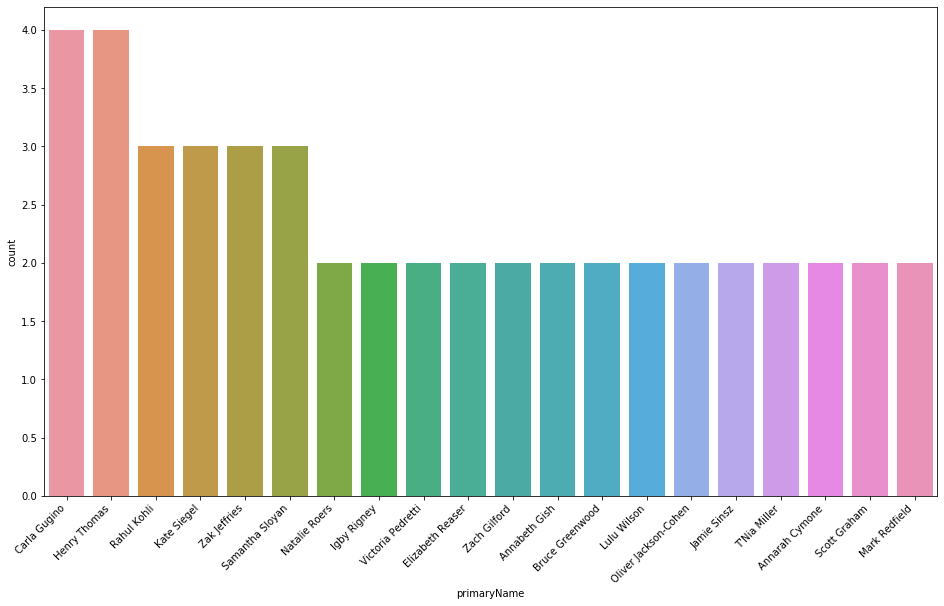

In [83]:
# Preliminary visualisation.
plt.figure(figsize = (16, 9))
sns.countplot(x='primaryName', data=flanf1, order=flanf1['primaryName'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [81]:
# Export file for visualisation in Tableau.
flanf.to_csv('Mike_Flanagan_Tableau.csv', index=False)